# Assignment 5

Name 1: Sharmila Upadhyaya  <br/>
Student id 1:7008858  <br/>
Email 1: shup00001@stud.uni-saarland.de <br/>


Name 2: Isidora Jeknic <br/>
Student id 2:7008924  <br/>
Email 2: isje00001@stud.uni-saarland.de  <br/> 

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook and the respective Python files for exercises 1 and 2. There is no need to submit the data files. <br/>
Upload the zipped folder in Teams. Make sure to click on "Turn-in" after your upload your submission, otherwise the assignment will not be considered as submitted. Only one from the group should make the submisssion.

---


## Exercise 1: Out Of Vocabulary Words (3.5 points)

As you saw in the lecture, the higher the number of unseen tokens in your language corpus, the higher the OOV rate. In this exercise, you will calculate the OOV rate for different languages for different vocabulary sizes. For each corpus, preprocess the data by lowercasing the text and applying tokenisation. Since there isn't any standard tokeniser that will work on all the languages, we recommend that you write your own function called `preprocess` in `exercise_1.py`.

### 1.1 Preprocess data (0.5 points)

Preprocess the data and partition it in a 70-30% train-test split. For this, write your own function `train_test_split_data` in `exercise_1.py`. You may modify the function signature and the code in the cell below appropriately.

In [15]:
from importlib import reload
import os
import exercise_1
exercise_1 = reload(exercise_1)

# Walk through the data directory and read all the corpora
# For each corpus, read the text, preprocess it and create the train test split for each language

corps = ['data/corpus.en', 'data/corpus.fi', 'data/corpus.ru', 'data/corpus.ta']

corpora = {} # To save the respective corpora

for elem in corps:
    
    with open(elem, 'r', encoding='utf-8') as corpus:
        text = corpus.read()
#     corpora[elem] = text

# TODO: Add a loop over each file
# for lang, text in corpora.items():
    pp = exercise_1.preprocess(text) #TODO: preprocess text
    train, test = exercise_1.train_test_split_data(pp, test_size=0.3) #TODO: split data

    #TODO: Add respective splits to the corpora dict
    corpora[elem[-2:]] = [train, test]

### 1.2 Calculate OOV rates (1.5 points)
For every language, construct a vocabulary by taking the 15000 most frequent tokens in the training set. Compute the OOV rate for vocabulary sizes 1k, 2k, ..., 15k. Implement this in the function `get_oov_rates` in `exercise_1.py`. 

In [16]:
oov_rates = {}
for lang, (train, test) in corpora.items():
    oov_rates[lang] = exercise_1.get_oov_rates(train, test)

8108
15000
14556
15000


### 1.3 Plotting OOV rates (1 point) 
* Using the loglog scale, plot the OOV rate against the vocabulary size for all the languages in a single plot. Make sure your legend identifies the languages appropriately and you label the axes.

* Describe your observations in 3-4 sentences.

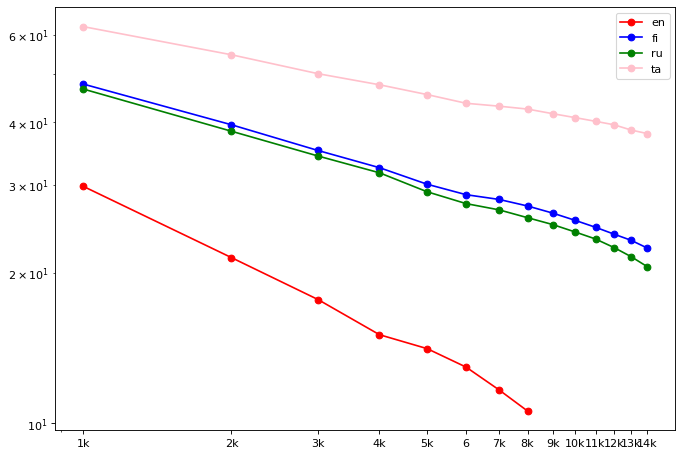

In [17]:
exercise_1.plot_oov_rates(oov_rates)

## **Answer**
We first notice that the English and Russian corpora do not have 15000 unique words in their test sets, which is significantly more noticable with English (~8000 tokens, c.f. ~14500 in Russian), as the OOV-rate plateaus after the "8k" vocabulary size mark.  
Another observation is that, naturally, the larger the vocabulary size, the smaller the OOV-rate, as the test set is being exposed to more material, which implies a greater likelihood of the token in question being encountered.  
Additionally, more inflective languages (e.g. German) will have a greater OOV-rate, as the word formation processes used to generate new words all include "sticking together" other vocabuary items into a single word/token, making it highly context sensitive. This also translates into more cases and genders, as that just creates more unique units that (unless stemmed and lemmatized) will facilitate the need for a larger initial vocabulary.

### 1.4 Handling OOV words (0.5 points)
* Before applying smoothing and backing-off models, we need to take care of the OOV words. Suggest 2 techniques to handle Out-Of-Vocabulary words your corpus.
* What are the advantages and disadvantages of each?

## **Answer**
Depending on the task, a possibility for OOV handling would be replacing it by taking the embedding of the sentence and, based on context, finding the most similar words that are in the vocabulary. A pro of this approach is that it can be applied to any sentence where there are words in the vocabulary and that the results will usually be relevant. However, in corpora with large OOV-rates, there is a possibility of the result being unrelated due to a high probability of an OOV occurring with other OOVs. Additionally, even in cases where the context provides sufficient information, the result is most likely going to be more general (and related to the concept, rather than a specific word). (this could also be done by using a ngram language model where n > 1.  
Another possibility would be to treat every OOV word as UNK and just remove it from the corpus. On the one hand, if there is a large enough vocabulary, the majority of words should be covered, therefore only the occasional unknown word would be removed (how detrimental this is depends on the task). A con is evidently that there is a high possibility of the vocabulary not being large enough and there being a disproportionately large number of UNK tokens that would be removed, which would skew the performance of the model. 


Alternate: character level ngram or stemming though stemming would not solve all problem

## Exercise 2: Smoothing (4 points)
 
### 2.1 Additive smoothing (1 point)

In the last assignments we largely ignored the issue of unseen words, i. s. words that are not in the train set/observed data but part of the test set. A very simple method to account for unseen words is [additive smoothing](https://en.wikipedia.org/wiki/Additive_smoothing). It assigns a small 'pseudo-count' to all unseen words AND to the words already in the language model, and then uses the updated counts to estimate the n-gram probabilities. The formula for unigram probabilities is:
\begin{equation}
p(w_i) = \frac{C(w_i) + \alpha}{N + \alpha |V|}
\end{equation}

Where
* $C(w_i)$ is the empirical count of the unigram $w_i$
* $N$ is the number of unigrams in the train set
* $|V|$ is the size of the vocabulary after smoothing
* $\alpha$ is the additive count.

If $\alpha = 1$ this is known as *Laplace* smoothing, if $0 < \alpha < 1$ *Lidstone* smoothing.

1. How would you estimate the bigram probability $p(w_i|w_{i-1})$ and the general case $p(w_i|w_{i-1}, ..., w_{n-i+1})$? Explain each part of the formula. (0.5 points)
2. Is it a good idea to set $\alpha$ to 1? What could be a more reasonable value, and why? (0.5 points)

### 2.2 Language model class (3 points)

Until now, you have implemented language models as a series of Python functions. We have provided to you a class skeleton in `lm.py` that should do all the tricks you need to estimate a language model. You will use the same corpora and train/test split as in Exercise 1.

1. Complete the implementation of the `LanguageModel` class. You may estimate the parameters of the language model as you like, but the method `perplexity` should perform the perplexity calculation (as in the below code block), and the method `lidstone_smoothing` should smooth the data. You may define new methods or change the signatures of existing ones, as long as you comment on your changes. Make sure that the relative frequencies and the conditional probabilities for each history sum up to 1. (1.5 points)

2. Choose $\alpha = 1$. Then, estimate $N = 1,2,3$ language models for the corpora from Exercise 1, and plot perplexity vs. $n$ for each of them. Do so by implementing the function `plot_pp` in `exercise_2.py` Do you observe any differences between the languages? Explain what you see in 3-4 sentences. (1 point)


## **Answer**
$14

# For Bigram model #
\begin{equation}
p(w_i|w_{i-1}) = \frac{C(w_{i-1},w_i) + \alpha}{C(w_{i-1}) + \alpha |V_{w_{i-1},\bullet}|}
\end{equation}

where, $C(w_{i-1},w_i)$ is the count of bigram $(w_{i-1},w_i)$ in the train corpus.

$C(w_{i-1})$ is the count of w_{i-1} in the train corpus.

$V_{w_{i-1},\bullet}$ is the number of bigrams starting from $w_{i-1}$  in the new history.

$\alpha $ is the smoothing parameter which could be set to value greater than 0 for smoothing.

# For General model #

\begin{equation}
p(w_i|w_{i-1}, ..., w_{n-i+1}) = \frac{C(w_{n-i+1},..., w_{i-1},w_i) + \alpha}{C(w_{n-i+1},..., w_{i-1}) + \alpha |V_{w_{n-i+1},..., w_{i-1},\bullet}|}
\end{equation}


where, $C(w_{n-i+1},..., w_{i-1},w_i)$ is the count of ngram $(w_{n-i+1},..., w_{i-1},w_i)$ in the train corpus.

$C(w_{n-i+1},..., w_{i-1})$ is the count of ngram $(w_{n-i+1},..., w_{i-1})$ in the train corpus.

$V_{w_{n-i+1},..., w_{i-1},\bullet}$ is the number of ngrams starting from $w_{n-i+1},..., w_{i-1}$ in the new history.

$ 2 $

Setting $\alpha$ value to 1 would not be good for all cases, as it can create huge distortion in the probability of unseen words. The alpha parameter controls how much of the probability mass we want to reassign to the unseen terms. So, it takes away too much probability mass from seen events. Setting alpha to 1 could assign too much total probability mass to unseen events, while setting it to values between 0 and 1 would be the good option as we can parametrise the value to fit the corpus. So, we should rather use lidstonesmoothing(setting alpha from 0 to 1) and set the value of alpha according to the corpus.


{'en': [1310.8698160848026, 33.53335486945066, 2.2885670181050974], 'fi': [5367.550390116472, 9.908074005542867, 1.6039190357111972], 'ru': [4473.126249894581, 15.410048395690886, 1.5228525590011195], 'ta': [13100.300270742924, 8.23376460041166, 1.176838923319323]}


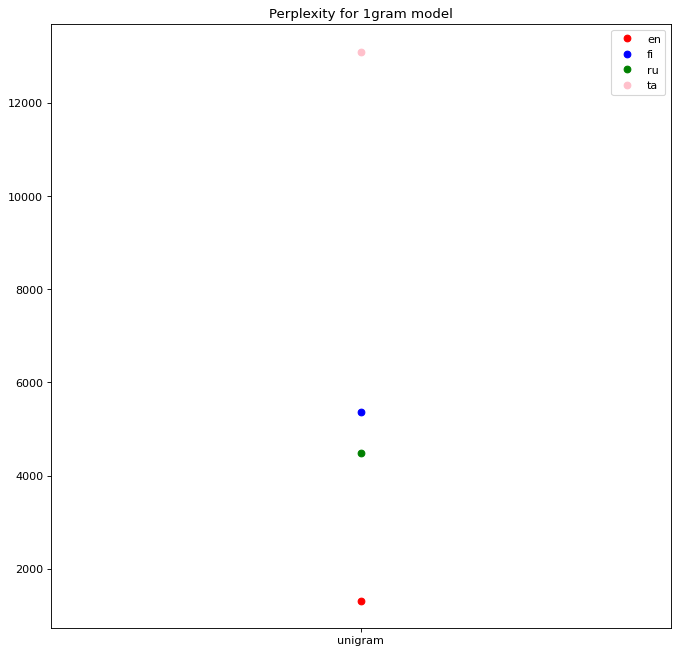

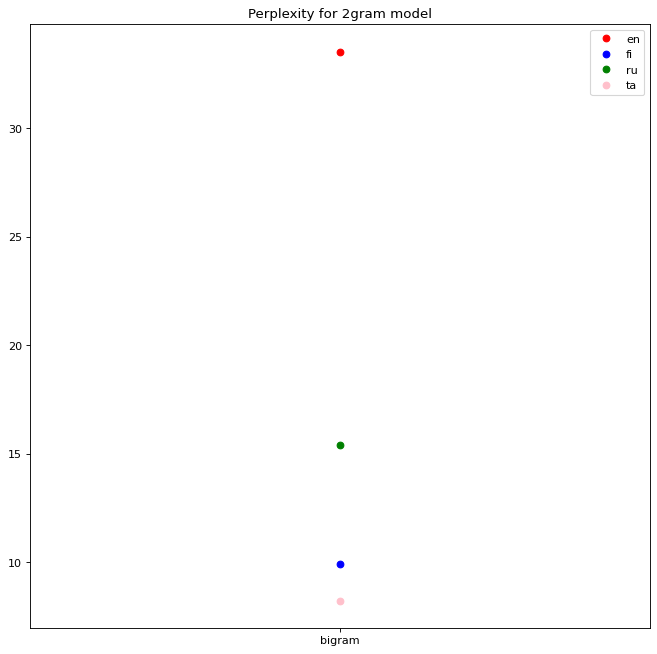

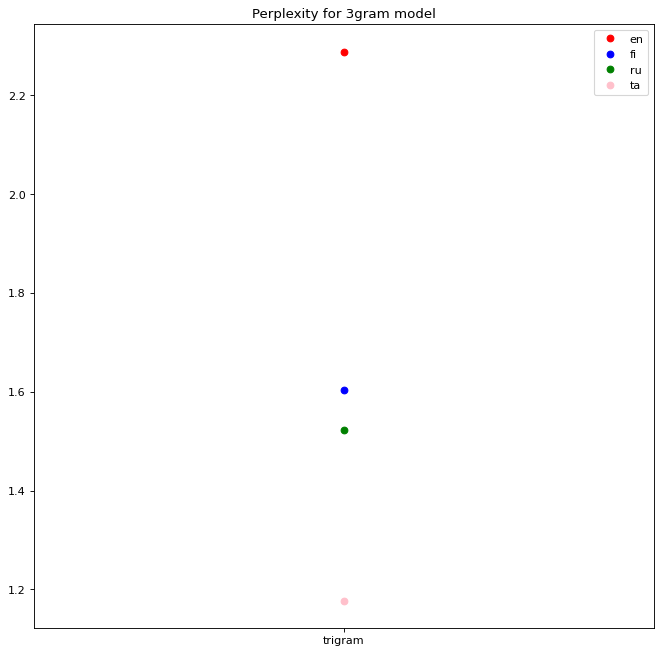

In [21]:
from importlib import reload
import lm
import exercise_2
lm = reload(lm)
exercise_2 = reload(exercise_2)

N = 3
PPS = dict()

for lang, (train, test) in corpora.items():
  
    LM = lm.LanguageModel(train, test, N=N, alpha=1)
    PPS[lang] = LM.perplexity()
    
print(PPS)
  # TODO: calculate perplexity
exercise_2.plot_pp(PPS)

NOTE: We plot the perplexity vs ngram model different due to the range of perplexity value. Visualization made it look like all languages have almost same perplexity for bigram and trigram model as the perplexity decreases drastically for bigram and trigram

As we can see from the individual ngram plot. For unigram model, tamil which has highest oov rate seems to have very high perplexity which is followed by finnish, russian and english.This is as english dataset has less amount of unseen test, smoothing doesn't take large mass of training set and perplexity is low. While for tamil, perplexity is high.

However, for bigram model tamil has lower perplexity than all of the other languages and in trigram model too tamil has the lowest. It shows the smoothing makes significant difference on the perplexity of tamil language as its OOV rate is higher.

3. Now, find a good value for $\alpha$ for the *English* corpus. Do so by estimating $K=100$ trigram language models with $\alpha = 0.0, 0.01,...,0.99,1.0$, and plot trigram perplexity vs. increasing $\alpha$. You can write the code for the loop in the code cell below, the plotting code should be in `plot_pp_vs_alpha` in `exercise_2.py`. Does the $\alpha$ coincide with your estimate in 2.1.2? (0.5 points)

/mnt/classes-so/Statistical-NLP-2021-Summer/assignments/Assignment5/lm.py:136: RuntimeWarning: invalid value encountered in double_scalars
  temp_probs[pair] = smoothened_count[pair]/(self.alpha*v_prev[tuple(list(pair)[:-1])] + previous_unsmoothened_count[set_prev])
/mnt/classes-so/Statistical-NLP-2021-Summer/assignments/Assignment5/lm.py:152: RuntimeWarning: divide by zero encountered in log2
  pp = np.log2(P) * f
/mnt/classes-so/Statistical-NLP-2021-Summer/assignments/Assignment5/lm.py:153: RuntimeWarning: divide by zero encountered in double_scalars
  pps.append(1/(2**pp.sum()))


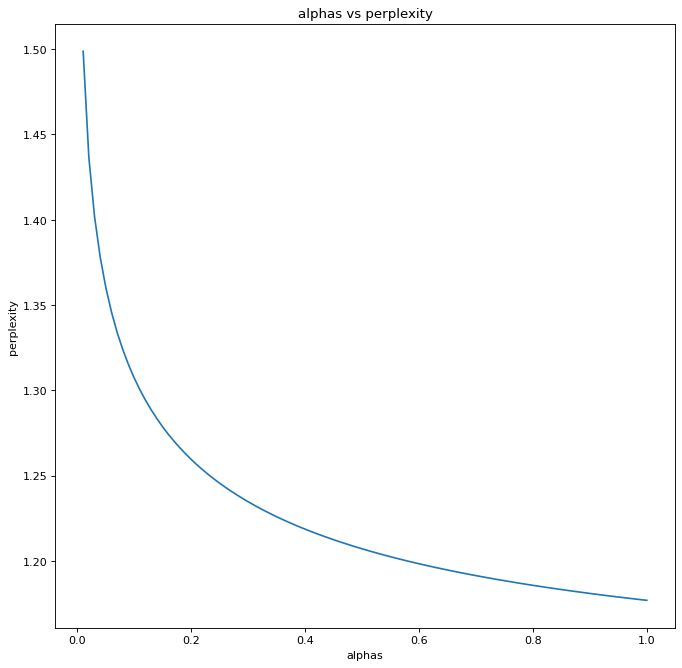

In [20]:
import numpy as np
# only for 1 langauge?
lang = "corpus.en"
train, test = corpora["ta"]
N = 3
K = 100

PPs = []

alphas = np.arange(0,1.01,0.01)

# TODO: Loop
for x in np.arange(0,1.01,0.01):
    LM = lm.LanguageModel(train, test, N=N, alpha=x)
    PPs.append(LM.perplexity()[2])

exercise_2.plot_pp_vs_alpha(PPs, alphas)

Here, value of perplexity decreases with alpha. The value of perplexity when alpha is 1 is same as in 2.2.


## Exercise 3: Misc. (2.5 points)

## 3.1 Smoothed perplexity (1 point)

Assume you trained (MLE) an n-gram language model on datasets $D_\text{train}$ and $D_\text{test}$. You measure perplexities $p_{1,\text{train}}$ and $p_{1,\text{test}}$ respectively. You then smooth your n-gram language model and evaluate again on the two datasets, resulting in $p_{2,\text{train}}$ and $p_{2,\text{test}}$. Answer the following question with brief comments (e.g. _"X is always greater than Y because .."_). For a language model $p$, test perplexity can, for example, be computed as $2^{\frac{-1}{|D_\text{test}|} \sum_{w \in D_\text{test}}\log p(w|h)}$ and train perplexity as $2^{\frac{-1}{|D_\text{train}|} \sum_{w \in D_\text{train}}\log p(w|h)}$.

1. What is the relation of $p_{1,\text{train}}$ and $p_{1,\text{test}}$?
2. What is the relation of $p_{2,\text{train}}$ and $p_{2,\text{test}}$?
3. What is the relation of $p_{1,\text{train}}$ and $p_{2,\text{train}}$?
4. What is the relation of $p_{1,\text{test}}$ and $p_{2,\text{test}}$?
5. How does $n$ size affect the perplexities?

## 3.2 Infinite smoothing (0.5 points)

What distribution would you get if you applied additive or absolute discounting (choose one) smoothing infinitely? e.g. if $F_\text{smooth}$ is a function that smooths a language model (either additive or absolute discounting) and $\text{lm}^{(n+1)} = F_\text{smooth}(\text{lm}^{(n)})$. What will the language model $\lim_{n\rightarrow \infty} \text{lm}^{(n)}$ look similar to?

## 3.3 Convex combination of LM models (1 point)

Consider the following quantity based on two independent language models $p_1$ and $p_2$.

$f_3(w|h) = \beta_1\cdot p_1(w|h) + \beta_2\cdot p_2(w|h)$ where $\beta_1 + \beta_2 = 1$ and $\beta_1 \ge 0, \beta_2 \ge 0$

- Is it still a language model (probability distribution given history $h$)? Show that all properties hold or find a counterexample for each: (1) non-negativity, (2) summation to 1 and (3) $\sigma$-additivity. See [Wikipedia - Probability Axioms](https://en.wikipedia.org/wiki/Probability_axioms). (0.5 points)
- What would be the possible gain of using the given function as a language model? (0.5 points)

# Answer #
$3.1$

1. What is the relation of $p_{1,\text{train}}$ and $p_{1,\text{test}}$?

  -> $p_{1,\text{train}}$ would be less than $p_{1,\text{test}}$, as train set has words already seen by the model. Moreover, smoothing is not done which makes the case clearer.

2. What is the relation of $p_{2,\text{train}}$ and $p_{2,\text{test}}$?

  -> $p_{2,\text{train}}$ would be less than $p_{2,\text{test}}$, as train set has words already seen by the corpus. Hence, perplexity should be the minimum. Though smoothing makes test perplexity lower, still it would be more than train perplexity.

3. What is the relation of $p_{1,\text{train}}$ and $p_{2,\text{train}}$?

  -> $p_{1,\text{train}}$ would be higher than $p_{2,\text{train}}$, as with 
  greater value of n, perplexity decreases.
  
4. What is the relation of $p_{1,\text{test}}$ and $p_{2,\text{test}}$?

  -> $p_{1,\text{test}}$ would be higher than $p_{2,\text{test}}$ as bigram has less perplexity than unigram. Also, because of smoothing bigram perplexity would be less.

5. How does $n$ size affect the perplexities?

  -> perplexity will decrease with increase in n (ngram model). But it will not be the case for larger n. In that case, it depeneds on the corpus size as with very high n, each pair of ngram will only exist one or less times. There will be possibilities that test ngram would not even exist in the train corpus.

$3.2$

When the unigram model is completely smoothed i.e. infinite additive smoothing, we will be adding infinite pseudo count to each word and hence thier propabilities would be uniform.

$3.3$

$Non Negativity$

According to the first axiom, The probability of an event is a non-negative real number:
$p_1(w|h) >0$ and $p_2(w|h)$ >0

Given is: $\beta_1 \ge 0, \beta_2 \ge 0$

Hence,
$f_3(w|h) = \beta_1\cdot p_1(w|h) + \beta_2\cdot p_2(w|h)$ $= \ge 0$

*Summation to One*
This would nit hold as we are using two independent language model and the probability given by them is independent. Even though $\beta$ value acts as weight, the summation would not be 1.




*Possible gain*  could be that we get information or probability distribution from two different models and can tune these probability by the weights. 

## Bonus (1 point)

Read about the following special language models techniques. The provided links shold only serve as a starting point.



#### 1. [Neural language models](https://en.wikipedia.org/wiki/Language_model#Neural_network) (0.5 points)

- Describe (~5 sentences or bullet points) the working, advantages and disadvantages of NLM.

#### 2. [Class-based language models](https://www.cs.cmu.edu/~roni/11761/PreviousYearsHandouts/classlm.pdf) (0.5 points)

- What is a class-based language model?
- What issues does it address?
- Can we utilize the output for something more than just language modelling (think about other NLP problems and classes you took)?

<!-- #### 2. [Decoding](https://machinelearningmastery.com/beam-search-decoder-natural-language-processing/) (0.5p)

- What issues does beam search in the context of text generation using language models solve? -->
 <!-- and . Be specific and practical in your answers and support your arguments with evidence.  -->

## 1. 
* Neural language models use NNs to predict probabilities given a context by utilizing word embeddings, and "learn" patterns by adjusting the weight matrices (through, e.g. gradient descent + backprop algorithm)
* One advantage of neural langauge models is that they can account for data scarcity by using non-linearity and a distributive representation (by making use of word embeddings, the model learns the most potent features). Moreover, it is able to capture more refined (e.g. compositional semantic) information by utilizing vector properties of word embeddings.
* A disadvantage of neural models is how cumbersome they can be and how inefficient the runtime is (which is why many state-of-the-art systems still utilize backing-off language models). 

## 2. 
- A class based language model utilizes word classes to generalize the history, so the probability of a word given the history is equal to the probability of said word being a particular class multiplied by the probability of that class following the sequence of classes of the units in the history. (emission probability $\times$ transition probability)
- The issue of handling OOV tokens.
- POS tagging